### Conjunto de datos de campañas de marketing de supermercados

##### Contexto : una gran tienda está planeando la venta de fin de año. Quieren lanzar una nueva oferta: membresía dorada, que otorga un 20% de descuento en todas las compras, por solo  499, que es  999 en otros días. Será válido solo para clientes existentes y actualmente se está planificando la campaña a través de llamadas telefónicas para ellos. La gerencia siente que la mejor manera de reducir el costo de la campaña es hacer un modelo predictivo que clasifique a los clientes que podrían comprar la oferta.Objetivo- El hipermercado quiere predecir la probabilidad de que el cliente dé una respuesta positiva y quiere identificar los diferentes factores que afectan la respuesta del cliente. Debe analizar los datos proporcionados para identificar estos factores y luego construir un modelo de predicción para predecir la probabilidad de que un cliente dé una respuesta positiva.

In [101]:
#Importamos librerias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC     
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
import pickle 



In [102]:
#Cargamos los datos del dataset 
cms = pd.read_csv('superstore_data.csv')

In [103]:
#tomaremos el id como indice para identificar cada cliente
df = pd.DataFrame(cms, columns= ['Id','Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency','MntWines'
,'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases'
,'NumStorePurchases','NumWebVisitsMonth','Response','Complain'])

df.set_index('Id', inplace= True)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Id,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,37,1,7,3,7,5,1,0
10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,30,1,3,2,5,2,0,0
1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,...,0,0,0,1,1,0,2,7,0,0
5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,18,...,47,48,78,2,5,2,11,4,0,0
5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,10,...,3,8,16,1,1,0,3,8,0,0
22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,2,...,15,5,14,2,6,1,5,8,0,0


In [104]:
df.to_csv('MarketingCampaign.csv', index=False)

In [105]:
#Buscaremos la columna con mayor correlacion entre todas las tablas
corr = round(df.corr(),3)
corr.style.background_gradient()

C:\Users\yes_2\AppData\Local\Temp\ipykernel_2616\2214135376.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = round(df.corr(),3)


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Year_Birth,1.000000,-0.162000,0.230000,-0.352000,-0.020000,-0.158000,-0.018000,-0.031000,-0.042000,-0.018000,-0.062000,-0.061000,-0.145000,-0.121000,-0.128000,0.121000,0.021000,-0.030000
Income,-0.162000,1.000000,-0.429000,0.019000,-0.004000,0.579000,0.431000,0.585000,0.439000,0.441000,0.326000,-0.083000,0.388000,0.589000,0.529000,-0.553000,0.133000,-0.027000
Kidhome,0.230000,-0.429000,1.000000,-0.036000,0.009000,-0.496000,-0.373000,-0.437000,-0.388000,-0.371000,-0.350000,0.222000,-0.362000,-0.502000,-0.500000,0.448000,-0.080000,0.040000
Teenhome,-0.352000,0.019000,-0.036000,1.000000,0.016000,0.005000,-0.177000,-0.261000,-0.204000,-0.162000,-0.022000,0.388000,0.155000,-0.111000,0.051000,0.135000,-0.154000,0.003000
Recency,-0.020000,-0.004000,0.009000,0.016000,1.000000,0.016000,-0.004000,0.023000,0.001000,0.023000,0.017000,-0.001000,-0.011000,0.025000,0.001000,-0.021000,-0.198000,0.013000
MntWines,-0.158000,0.579000,-0.496000,0.005000,0.016000,1.000000,0.390000,0.563000,0.400000,0.387000,0.388000,0.011000,0.542000,0.635000,0.642000,-0.321000,0.247000,-0.039000
MntFruits,-0.018000,0.431000,-0.373000,-0.177000,-0.004000,0.390000,1.000000,0.543000,0.595000,0.567000,0.393000,-0.132000,0.297000,0.488000,0.462000,-0.418000,0.125000,-0.005000
MntMeatProducts,-0.031000,0.585000,-0.437000,-0.261000,0.023000,0.563000,0.543000,1.000000,0.568000,0.524000,0.351000,-0.122000,0.294000,0.724000,0.480000,-0.539000,0.236000,-0.023000
MntFishProducts,-0.042000,0.439000,-0.388000,-0.204000,0.001000,0.400000,0.595000,0.568000,1.000000,0.580000,0.423000,-0.139000,0.294000,0.534000,0.460000,-0.446000,0.111000,-0.021000
MntSweetProducts,-0.018000,0.441000,-0.371000,-0.162000,0.023000,0.387000,0.567000,0.524000,0.580000,1.000000,0.370000,-0.120000,0.349000,0.491000,0.449000,-0.423000,0.117000,-0.022000


In [106]:
#Seleccionamos las columnas con mas correlacion y si se logro una venta
cmk = df.loc[:,['NumCatalogPurchases','MntMeatProducts','MntFishProducts','MntSweetProducts','Response']]
cmk

,NumCatalogPurchases,MntMeatProducts,MntFishProducts,MntSweetProducts,Response
Id,,,,,
1826,4,379,111,189,1
1,3,64,7,0,1
10476,2,59,15,2,0
1386,0,1,0,0,0
5371,1,24,11,0,1
...,...,...,...,...,...
10142,2,126,47,48,0
5263,0,13,3,8,0
22,1,88,15,5,0


In [107]:
x = cmk.loc[:,['NumCatalogPurchases','MntMeatProducts','MntFishProducts','MntSweetProducts']]
y = cmk.loc[:,['Response']].values.ravel()

In [108]:
# Separamos los datos en entrenamiento y prueba
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [109]:
escalar = StandardScaler()
lin_reg = LinearRegression()
log_reg = LogisticRegression()
bayes = GaussianNB()
svc_m = SVC()


In [110]:
#Escalamos los datos para la regresion logistica
x_train = escalar.fit_transform(x_train)
x_test = escalar.transform(x_test)

In [111]:
#Empezamos con el entrenamiento de los modelos
lin_regr = lin_reg.fit(x_train,y_train)
log_regr = log_reg.fit(x_train, y_train)
svc = svc_m.fit(x_train,y_train)
bayes = bayes.fit(x_train, y_train)

In [112]:
#Prediccion
predictli = lin_regr.predict(x_test)
predictlo = log_regr.predict(x_test)
predictsv = svc.predict(x_test)
predictnb = bayes.predict(x_test)

In [113]:
log_reg.score(x_train, y_train)

0.8510044642857143

In [114]:
lin_reg.score(x_train,y_train)

0.051478113346953736

In [124]:
# Matriz de confusion
matrizsv = confusion_matrix(y_test, predictsv)
matriznb = confusion_matrix(y_test, predictnb)
matrizlo = confusion_matrix(y_test, predictlo)



In [116]:
#Precision del modelo SVM
precisionsv = precision_score(y_test, predictsv)
precisionsv

0.625

In [123]:
#Presicion del modelo Naive bayes
precisionnb = precision_score(y_test, predictnb)
precisionnb

0.3375

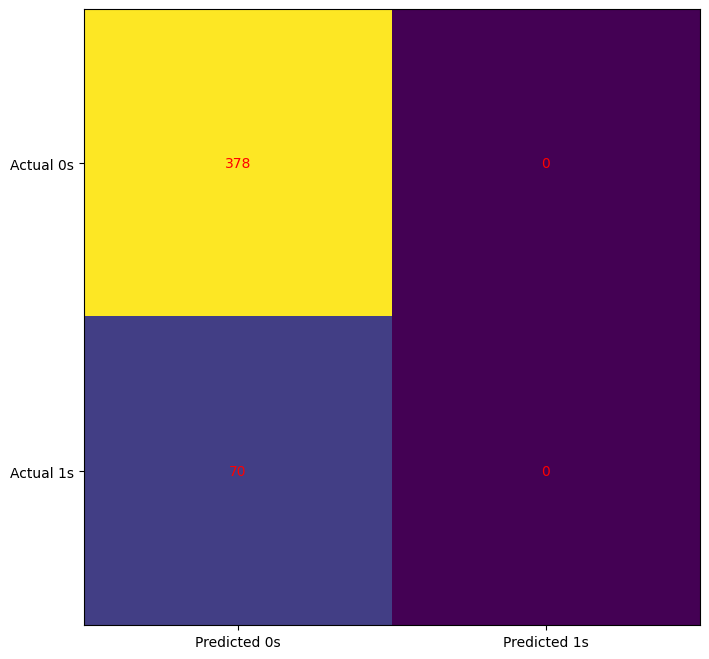

<Figure size 640x480 with 0 Axes>

In [130]:
#Visualizamos
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(matrizlo)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrizlo[i, j], ha='center', va='center', color='red')
plt.show()
plt.savefig("MatrizdeConfusion.png")